In [5]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.descriptivestats import sign_test
import seaborn as sns
import pandas as pd

%matplotlib inline

## Задача 1

**Доказательство:**

Рассмотрим правую часть уравнения из условия:

$$\bar{\rho_S} = \frac{1}{n}\sum\limits^{n}_{i = 1} \rho_i =  \frac{1}{n}\sum\limits^{n}_{i = 1} \left(1 - \frac{6}{k^3 - k}\sum\limits^{k}_{j = 1} (R_{ij} - j)^2 \right) = \frac{1}{n}\sum\limits^{n}_{i = 1} \left(1 - \frac{6}{k^3 - k}\sum\limits^{k}_{j = 1}\left(R_{ij}^2 - 2jR_{ij} + j^2\right) \right) = 1 -  \frac{6}{n(k^3 - k)}\sum\limits_{ij} \left(R_{ij}^2 - 2jR_{ij} + j^2\right) = *$$

Рассмотрим суммирование по строкам: $\sum\limits_{i = 1}^{n}\sum\limits_{j = 1}^{k} \left(R_{ij}^2 + j^2\right)$. Т.к. $R_{ij}^2$ по $j$ пробегает все те же значения, что и $j^2$, то $\sum\limits_{j = 1}^{k} \left(R_{ij}^2 + j^2\right) = \sum\limits_{j = 1}^{k} 2j^2 = \dfrac{k(k + 1)(2k + 1)}{3}$ 

А значит:

$$* = 1 -  \frac{6}{n(k^3 - k)} \left(\frac{nk(k + 1)(2k + 1)}{3} - 2\sum\limits_{ij}jR_{ij}\right) = - \frac{3(k + 1)}{k - 1} + \frac{12}{nk(k^2 - 1)}\sum\limits_{ij}jR_{ij} = *$$

Из лекции, статистика критерия Пейджа $L = \sum\limits_{j = 1}^{k} j \sum\limits_{i = 1}^{n} R_{ij} = \sum\limits_{ij} jR_{ij}$

В итоге получаем:

$$* = \frac{12L}{nk(k^2 - 1)}- \frac{3(k + 1)}{k - 1}$$


**ЧТД**

## Задача 2

Зафиксируем некоторые четыре $i$: $j, k, l, m$ и рассмотрим $X_{jk}, X_{jl}, X_{mk}, X_{ml}$. Запишем $X_{jk} + X_{ml} - X_{jl} - X_{mk} = \mu + \alpha_j + \beta_k + \epsilon_{jk} + \mu + \alpha_m + \beta_l + \epsilon_{ml} - \mu - \alpha_j - \beta_l - \epsilon_{jl} - \mu - \alpha_m - \beta_k - \epsilon_{mk} = \epsilon_{jk}  + \epsilon_{ml}  - \epsilon_{jl} - \epsilon_{mk}$

Если $\epsilon_{ij}$ -- нормальные н.о.р. со средним $a$ и дисперсией $\sigma^2$, то $\epsilon_{jk}  + \epsilon_{ml}  - \epsilon_{jl} - \epsilon_{mk}$ -- нормальные со средним 0 и дисперсией $4\sigma^2$. 

Собственно, методика: взять четверки $X_{ij}$. И проделать с ними операции выше. Получим выборку $\epsilon_{jk}  + \epsilon_{ml} - \epsilon_{jl} - \epsilon_{mk}$  . Ее уже проверяем на нормальность

## Задача 3

## Задача 4

In [2]:
data = np.load('./data/hw7t4.npy')

In [4]:
np.unique(data[:, 0]), np.unique(data[:, 1])

(array([0., 1., 2., 3., 4.]), array([0., 1., 2., 3., 4.]))

In [ ]:
samples = []
for d_1 in np.unique(data[:, 1]):
    for d_2  in np.unique(data[:, 1]):
        

In [17]:
df = pd.DataFrame(data=data, columns=['factor_1', 'factor_2', 'target'])
df[:3]

,factor_1,factor_2,target
0,0.0,0.0,1.038829
1,0.0,0.0,2.842808
2,0.0,0.0,0.890729


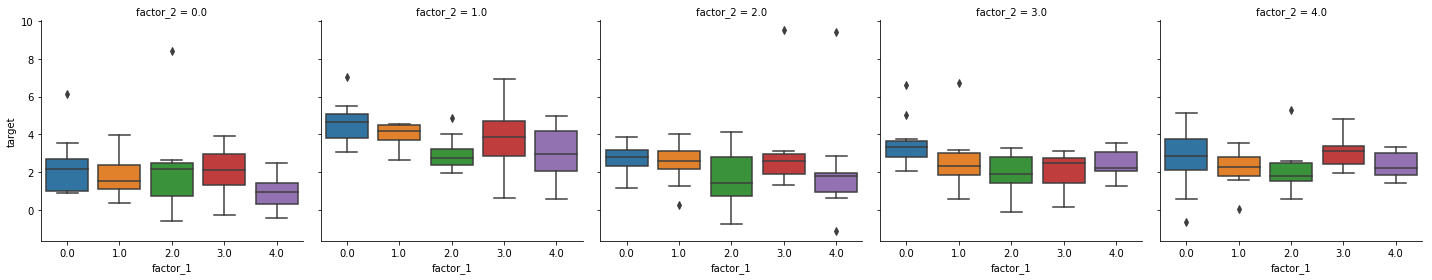

In [21]:
sns.factorplot(data=df, x="factor_1", y="target", col="factor_2", kind="box")
plt.show()

Не нормальное распределение

In [24]:
df_pivot = pd.pivot_table(data=df, index='factor_1', columns='factor_2', values='target', 
               aggfunc=lambda x: " ".join(map(str, x)))

In [47]:
datas = [list(map(float, x.split())) for x in df_pivot.values.ravel()]
n, k = len(datas[0]), len(datas)

Воспользуемся критерием Фридмана

In [48]:
stat, pval = sps.friedmanchisquare(*datas)

In [51]:
friedman = (stat * (n - 1) / (n * (k - 1) - stat))

In [52]:
print('Friedman stat = {:.3f}\nalpha and 1 - alpha ppf of f distr = {:.3f} and {:.3f}'.format(friedman, 
                                                                                              sps.f.ppf(0.05, n - 1, (n - 1) * (k - 1)), 
                                                                                              sps.f.ppf(0.95, n - 1, (n - 1) * (k - 1))))

Friedman stat = 4.245
alpha and 1 - alpha ppf of f distr = 0.366 and 1.923


Гипотезу об отсутствии влияния двух факторов отклоняем